# SOYABUL ISLAM
# Task_2: Prediction using Unsupervised ML
# Importing Necessary Libraries

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import  GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score

## Getting Data

In [88]:
iris= pd.read_csv("Iris.csv", index_col='Id')
iris.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


In [89]:
x= iris.iloc[:, 0:4]
y=iris.iloc[:, -1]
print(x.head(10))
print(y.head(10))

    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
Id                                                          
1             5.1           3.5            1.4           0.2
2             4.9           3.0            1.4           0.2
3             4.7           3.2            1.3           0.2
4             4.6           3.1            1.5           0.2
5             5.0           3.6            1.4           0.2
6             5.4           3.9            1.7           0.4
7             4.6           3.4            1.4           0.3
8             5.0           3.4            1.5           0.2
9             4.4           2.9            1.4           0.2
10            4.9           3.1            1.5           0.1
Id
1     Iris-setosa
2     Iris-setosa
3     Iris-setosa
4     Iris-setosa
5     Iris-setosa
6     Iris-setosa
7     Iris-setosa
8     Iris-setosa
9     Iris-setosa
10    Iris-setosa
Name: Species, dtype: object


## Visualizing data ith different plotting methods

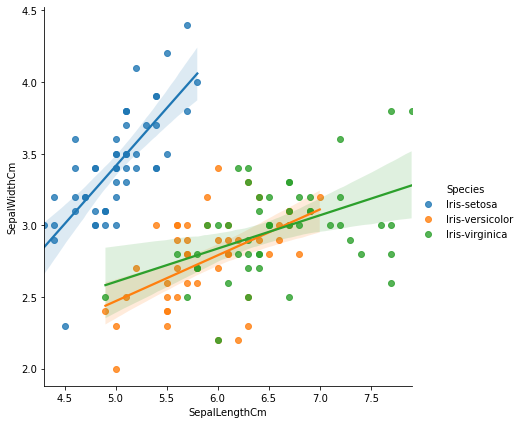

In [90]:

sns.lmplot(data=iris, x='SepalLengthCm', y='SepalWidthCm', hue='Species', height=6)

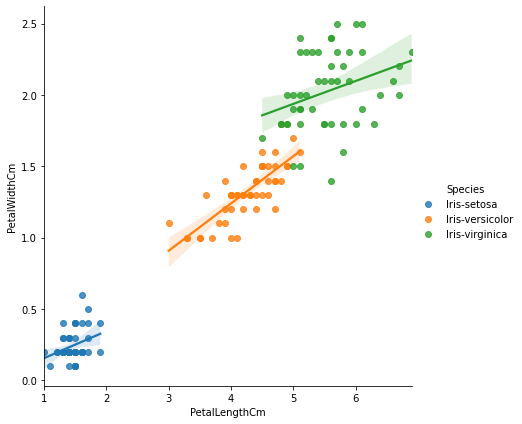

In [91]:
sns.lmplot(data=iris, x='PetalLengthCm', y='PetalWidthCm', hue='Species', height=6)

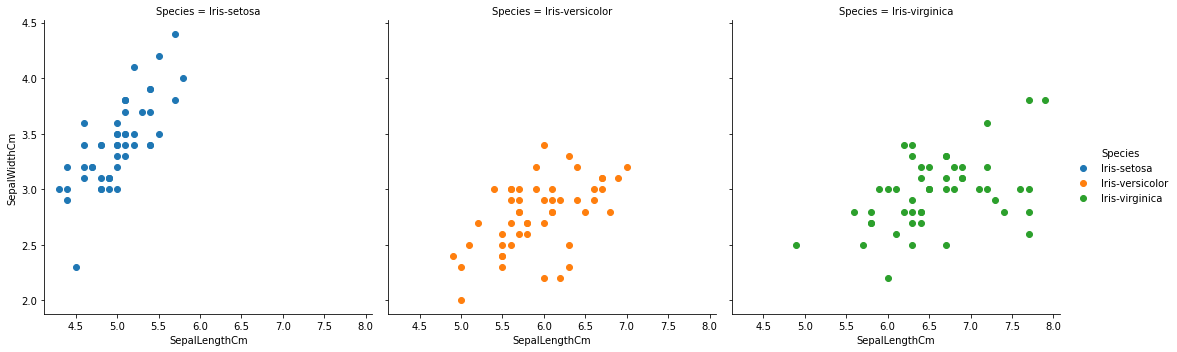

In [92]:
facet= sns.FacetGrid(iris, col="Species",hue="Species", height= 5)
facet.map(plt.scatter, 'SepalLengthCm','SepalWidthCm')
facet.add_legend()

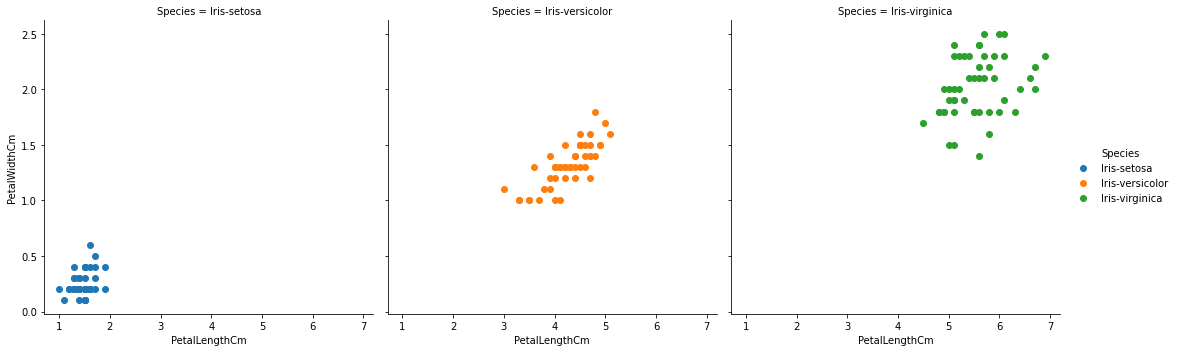

In [93]:
facet= sns.FacetGrid(iris, col="Species",hue="Species", height= 5)
facet.map(plt.scatter, 'PetalLengthCm','PetalWidthCm')
facet.add_legend()

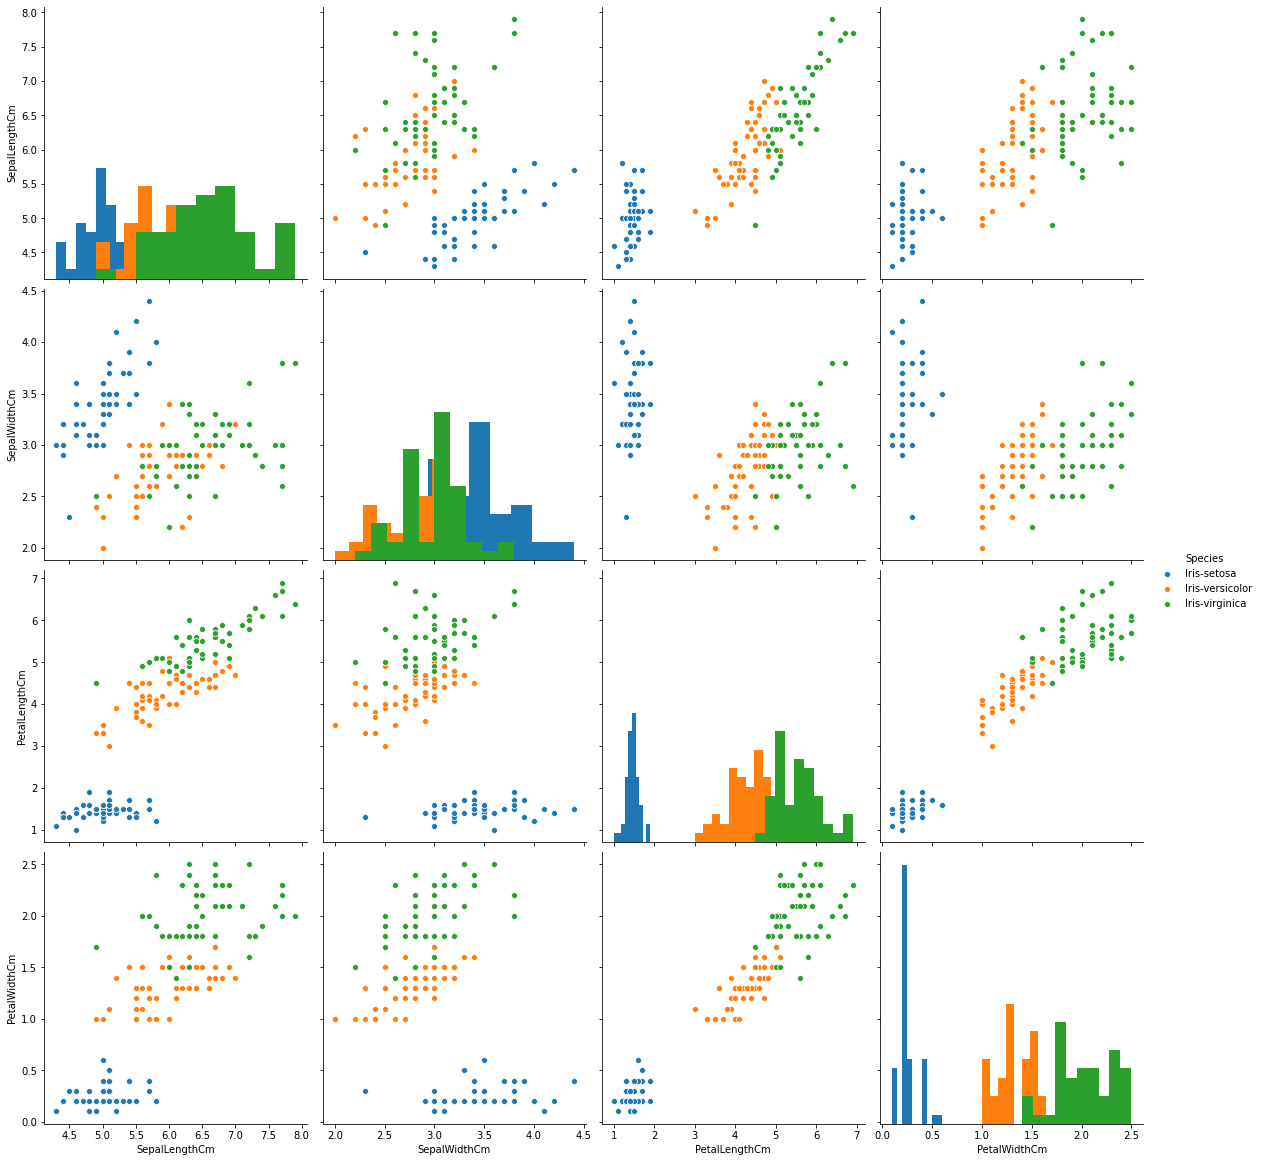

In [94]:
sns.pairplot(iris, hue="Species", diag_kind="hist", height=4);

## Scaling Data as given data is Unbalanced

In [95]:
data_scale= StandardScaler()
train=data_scale.fit_transform(x)
train_data= pd.DataFrame(train, columns= x.columns)
train_data


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


## K Means Clustering

In [96]:
kmean= KMeans(n_clusters=3, random_state=0)
kmean.fit(train_data)

kmean_cluster= kmean.predict(train_data)
kmean_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

## Spectral Clustering

In [97]:
spectral= SpectralClustering(n_clusters=3, random_state=0)
spectral.fit(train_data)

spectral_cluster= kmean.predict(train_data)
spectral_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

## Gaussian Mixture Model

In [101]:
gaussian= GaussianMixture(n_components=3)
gaussian.fit(train_data)
gaussian_cluster= gaussian.predict(train_data)
gaussian_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

## Silhouette Score

#### The score near +1 indicates that the sample is far from neighbouring Clustering. The score near 0 indicates that the sample is close to two neighbouring clusters




In [102]:
kmeans_score=silhouette_score(train_data, kmean_cluster)
spectral_score=silhouette_score(train_data, spectral_cluster)
gaussian_score=silhouette_score(train_data, gaussian_cluster)

print(f'K Mean clustering score: {kmeans_score}')
print(f'Spectral clustering score: {spectral_score}')
print(f'Gaussian Matrix score: {gaussian_score}')

K Mean clustering score: 0.4589717867018717
Spectral clustering score: 0.4589717867018717
Gaussian Matrix score: 0.3727731874570307


#### K Mean clustering silhouette score: 0.4589717867018717
#### Spectral clustering silhouette score: 0.4589717867018717
#### Gaussian Matrix silhouette score: 0.3727731874570307

Gaussian matrix method shows more accurate prediction


## Adjusted Random Method

#### The closer the value get near +1 the accurate is prediction of the model



In [103]:
kmeans_score_rand=adjusted_rand_score(y, kmean_cluster)
spectral_score_rand=adjusted_rand_score(y, spectral_cluster)
gaussian_score_rand=adjusted_rand_score(y, gaussian_cluster)


print(f'K Mean clustering score: {kmeans_score_rand}')
print(f'Spectral clustering score: {spectral_score_rand}')
print(f'Gaussian Matrix score: {gaussian_score_rand}')

K Mean clustering score: 0.6201351808870379
Spectral clustering score: 0.6201351808870379
Gaussian Matrix score: 0.9038742317748124


### Gaussian Matrix model shows better performance than KMean clustering and Spectral Clustering. The score of Gausssian Matrix Method is 0.9038742317748124, which is very close to 1